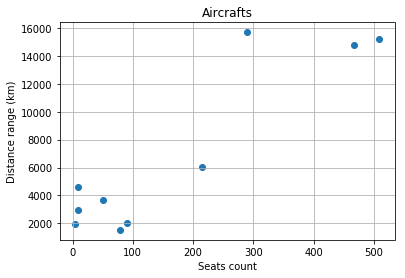

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as lg
import pprint as pp
import random
import math

#X=np.array([(4,1940),(412,5332),(52, 12934),(342, 10000),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

In [60]:

number_of_sets = 2
m = 2
epsilon = 0.0001

C = np.array([(0.0,0.0), (500,15000)])


#Dane wejsciowe  X  :  n x M, 
#Centra          C  :  number_of_sets
#Matrix assig    U  :  X x number_of_sets
#Distance Matrix A  :  n x n


def average(X):
    avr = np.array([(0,0)])
    for i in X:
        avr += i
    avr = avr/len(X)
    return avr

def calculate_A_Matix(X):
    avrg = average(X)
    
    R = np.array([(0.0,0.0),(0.0,0.0)])
    for x in X:
        i = x - avrg
        i = i * i.T
        R += i
    R = R/len(X)
 #   print(R)
    return np.linalg.inv(R)

def euclides_distance(x,y):
    d = 0.0
    for i in range(len(x)):
        d += (x[i] - y[i])**2
    return math.sqrt(d)


def diffrence(C,V,epsilon):
    for i in range(len(C)):
        for j in range(len(C[i])):
            if abs(C[i][j] - V[i][j]) > epsilon:
                return True
    return False


print("Average of X :")
print( average(X))
print("A matrix     :")
print( calculate_A_Matix(X))

Average of X :
[[ 194.38461538 7448.        ]]
A matrix     :
[[ 5.87607004e-05 -1.38519955e-06]
 [-1.38519955e-06  6.85381288e-08]]


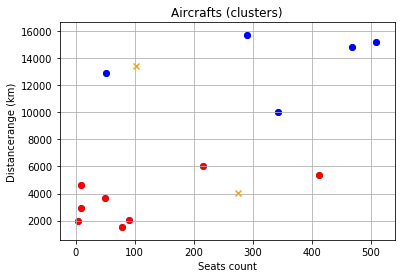

Current Centers :
[[  275.16646919  4021.36632777]
 [  102.23230505 13390.49531855]]


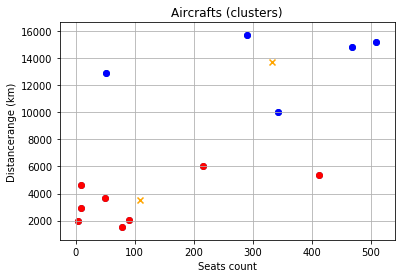

Current Centers :
[[  108.375  3521.875]
 [  332.    13729.8  ]]


In [66]:
def build_U_matrix():
    U = []
    
    for j in range(len(X)):
        p = []
        for i in range(number_of_sets):
            p.append(0.0)
        U.append(p)
    
    return np.array(U)
    
def first_assign_to_matrix(U,C):
    D = build_U_matrix()
    
    for i in range(len(X)):
        for j in range(len(C)):
            D[i][j] = euclides_distance(X[i],C[j])
            
    for i in range(len(X)):
        
        lowest_distance = 50000
        group_id        = -1
        for j in range(len(C)):
            if lowest_distance > D[i][j]:
                lowest_distance = D[i][j]
                group_id = j    
        U[i][group_id] = 1
        
       # print(U)
        
    return U

def plot(X, U,C):
    
    red  = []
    blue = []
    
    for i in range(len(X)):
        if U[i][0] == 1:
            red.append(X[i])
        else:
            blue.append(X[i])
    
    red = np.array(red)
    blue = np.array(blue)
    
    fig, ax = plt.subplots()

    ax.scatter(X[:,0],X[:,1])
    if len(blue) > 0:
        ax.scatter(blue[:,0],blue[:,1],c='blue')
    if len(red) > 0:
        ax.scatter(red[:,0],red[:,1],c='red')
    ax.scatter(np.array(C)[:,0],np.array(C)[:,1],c='orange', marker='x')
    
    ax.set(xlabel='Seats count', ylabel='Distancerange (km)',
           title='Aircrafts (clusters)')
    ax.grid()
    plt.show()

def recalculate_Center(U,X,C):
    
    V = np.array([(0.0,0.0),(0.0,0.0)])
    low = 0.0
    
    for j in range(len(C)):
        low = 0.0
        for i in range(len(X)):
            V[j] += U[i][j] * X[i]
            low += U[i][j]
        C[j] = V[j]/low

    return C
    
    
def HCM(X):
    U = build_U_matrix()
    
    C = np.array(
        [(random.random() * 600 ,random.random()*16000), 
         (random.random() * 600 ,random.random()*16000)])
    newC = C.copy()
    
    U = first_assign_to_matrix(U,newC)
    
    start = True
    
    while(diffrence(C, newC, epsilon ) or start):
        
        start = False    
        C = newC.copy()
        U = build_U_matrix()
        U = first_assign_to_matrix(U,newC)
        
        newC = recalculate_Center(U,X,newC)
        plot(X,U,C)
        print( "Current Centers :")
        print(  C   )

HCM(X)


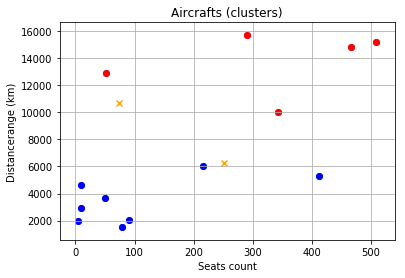

Current Centers :
[[   73.49320816 10711.24732137]
 [  251.36487854  6255.91150411]]


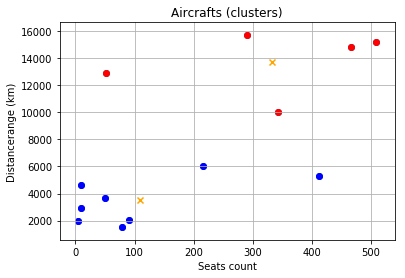

Current Centers :
[[  332.    13729.8  ]
 [  108.375  3521.875]]


In [67]:
def assign_to_matrix(U,D,C):
    
    for i in range(len(X)):
        lowest_distance = 0.0
        group_id        = -1
        for j in range(len(C)):
            if lowest_distance < D[i][j]:
                lowest_distance = D[i][j]
                group_id = j    
        U[i][group_id] = 1
        
    return U

def calculate_D_matrix(X,D,C):

    for i in range(len(X)):
        for j in range(len(C)):
            summ = 0.0
            for k in range(len(C)):
                summ += (euclides_distance(X[i],C[j])/euclides_distance(X[i],C[k])) ** (2/(m-1))
            D[i][j] = 1.0/summ
            
    return D


def FCM(X):
    U = build_U_matrix()
    D = build_U_matrix()
    
    C = np.array(
        [(random.random() * 600 ,random.random()*16000), 
         (random.random() * 600 ,random.random()*16000)])
    newC = C.copy()

    D = calculate_D_matrix(X,D,newC)
    U = assign_to_matrix(U,D,C)
    
    start = True
    
    while(diffrence(C, newC, epsilon ) or start):
        U = build_U_matrix()
        
        start = False    
        C = newC.copy()
    
        D = calculate_D_matrix(X,D,newC)
        U = assign_to_matrix(U,D,C)
        
        newC = recalculate_Center(U,X,newC)
        plot(X,U,C)
        print( "Current Centers :")
        print(  C   )


FCM(X)

[[  270.2508395  15955.92314435]
 [  189.86723727 13808.42737182]]


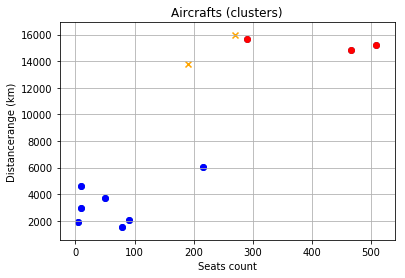

Current Centers :
[[  270.2508395  15955.92314435]
 [  189.86723727 13808.42737182]]


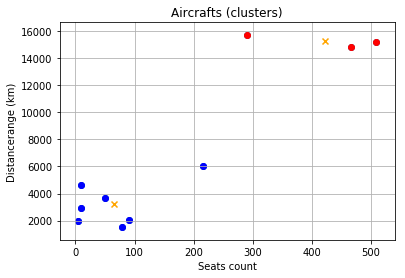

Current Centers :
[[  422.         15238.33333333]
 [   65.          3263.28571429]]


In [92]:
def calculate_R_matrix(X,R,C):
    return re_assign(X,R,C)


def re_assign(X,R,C):
    P = R.copy()
    for i in range(len(X)):
        for k in range(len(C)):
            DikA = math.sqrt(calculate_D_i_k_A(X,C,k,i))
            eta  = calculate_eta(C,X,R,k)
            p = ( DikA/eta )**(2/(m-1))
            P[i][k] = 1.0/(1.0 + p)
    return P
            

def calculate_D_i_k_A(X,C,k,i):
    A = calculate_A_Matix(X)
    T1 = (X[i]-C[k])
    D = T1.dot(A).dot(T1.T)
    return D

def calculate_eta(C,X,U,k):
    up   = 0.0
    down = 0.0
    for i in range(len(X)):
        t = calculate_D_i_k_A(X,C,k,i)
        up += (U[i][k]**m)*t
        down += (U[i][k]**m)
    
    return up/down if down != 0 else 0




def PCM(X):
    U = build_U_matrix()
    R = build_U_matrix()
    
    C = np.array(
        [(random.random() * 600 ,random.random()*16000), 
         (random.random() * 600 ,random.random()*16000)])
    
    C = np.array([(  270.2508395  ,15955.92314435),( 189.86723727, 13808.42737182)])
    print(C)
    
    newC = C.copy()

    U = first_assign_to_matrix(U,C)
    
    R = re_assign(X,U,C)
    
    
    start = True
    
    while(diffrence(C, newC, epsilon ) or start):
        U = build_U_matrix()
        
        start = False    
        C = newC.copy()
    
        R = calculate_R_matrix(X,R,newC)
        U = assign_to_matrix(U,R,C)
        
        newC = recalculate_Center(U,X,newC)
        plot(X,U,C)
        print( "Current Centers :")
        print(  C   )


PCM(X)
